In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
torch.manual_seed(42)
np.random.seed(42)

In [4]:
class Generator(nn.Module):
    def __init__(self, data_shape=(1, 28, 28), noise_shape=(128, 64)):
        super().__init__()

        self.noise_shape = noise_shape
        self.noise_dim = np.prod(noise_shape)
        
        self.data_shape = data_shape
        self.data_dim = np.prod(data_shape)

        self.generator = nn.Sequential(
            nn.ConvTranspose2d(noise_shape[0], 512, kernel_size=4, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=1, padding=2, bias=False),
            nn.Tanh()
        )

    def forward(self, noise):
        noise = noise.view(-1, *self.noise_shape)
        return self.generator(noise).view(-1, *self.data_shape)


class Discriminator(nn.Module):
    def __init__(self, data_shape = (1, 28, 28)):
        super().__init__()

        self.data_shape = data_shape
        self.discriminator = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=1, padding=2, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=4, stride=2, padding=0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, *self.data_shape)
        return self.discriminator(x).view(-1, 1)

In [5]:
data_shape = (1, 28, 28)
noise_shape = (128, 1, 1)
noise = torch.randn(16, *noise_shape)

In [7]:
gen = Generator(data_shape=data_shape, noise_shape=noise_shape)

loaded_state_dict = torch.load(f"saved_models/gen_dcgan.pt", map_location=torch.device('cpu'))
gen.load_state_dict(loaded_state_dict)
gen.eval()

Generator(
  (generator): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2), bias=False)
    (13): Tanh()
 

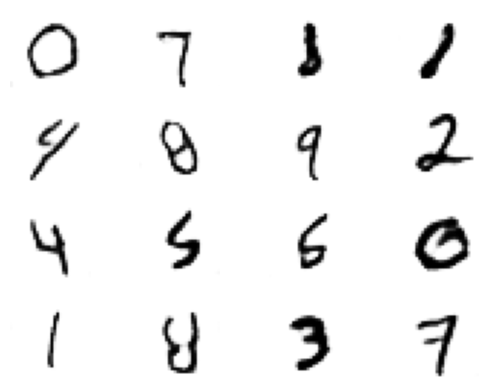

In [8]:
x_hat = gen(noise)
generated_images = x_hat.detach().numpy().reshape(-1, 28, 28)

plt.figure()

for i, img in enumerate(generated_images):
    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='binary')
    plt.axis('off')

plt.draw()